In [36]:
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import seaborn as sns

In [37]:
# File list
dir_list = []
for dir in os.listdir('./DevGPT'):
    if 'snapshot' in dir:
        dir_list.append(f'./DevGPT/{dir}')

print(dir_list)


['./DevGPT/snapshot_20230824', './DevGPT/snapshot_20230831', './DevGPT/snapshot_20230727', './DevGPT/snapshot_20231012', './DevGPT/snapshot_20230907', './DevGPT/snapshot_20230810', './DevGPT/snapshot_20230817', './DevGPT/snapshot_20230803', './DevGPT/snapshot_20230914']


#### Loading Json File by Path

In [38]:
def load_json(file_path):
    json_file_path = file_path

    with open(json_file_path, 'r') as file:
        # Load JSON data into a Python object
        return json.load(file)

def execute_in_all(filelist, func):
    result_list = []
    for folder in filelist:
        for filename in os.listdir(folder):
            if filename.endswith('.json'):
                file_path = os.path.join(folder, filename)
                data = load_json(file_path)
                result_list += func(data)
    return result_list
        

### RQ1. What is the distribution of different issues that developer present to ChatGPT on link shared to github?

#### Method 1: Visualization of Different type of Github Links

In [39]:
type_list = []

def count_type(data):
    type_list = []
    for source in data['Sources']:
        for share in source['ChatgptSharing']:
            if 'DateOfConversation' in share:
                type_list.append((source['Type'], share['DateOfConversation']))
    return type_list

type_list += execute_in_all(filelist=dir_list, func=count_type)

In [40]:
time_dict = {}
for type in type_list:
    try:
        date = pd.to_datetime(type[1], format="%B %d, %Y")
        time = date.strftime("%B %Y")
        if time not in time_dict:
            time_dict[time] = {}
        if type[0] not in time_dict[time]:
            time_dict[time][type[0]] = 1
        else:
            time_dict[time][type[0]] += 1
    except:
        continue

print(time_dict)

{'July 2023': {'issue': 945, 'discussion': 147, 'commit': 1382, 'code file': 3882, 'pull request': 785, 'hacker news': 627}, 'August 2023': {'issue': 721, 'discussion': 63, 'commit': 1331, 'code file': 2146, 'pull request': 240, 'hacker news': 705}, 'June 2023': {'issue': 999, 'discussion': 144, 'commit': 143, 'code file': 3312, 'pull request': 628, 'hacker news': 783}, 'May 2023': {'issue': 244, 'discussion': 18, 'commit': 26, 'code file': 500, 'pull request': 36, 'hacker news': 189}, 'September 2023': {'commit': 304, 'discussion': 25, 'pull request': 83, 'code file': 771, 'issue': 295, 'hacker news': 42}, 'October 2023': {'commit': 15, 'pull request': 19, 'code file': 129, 'issue': 36}}


In [41]:
time_df = pd.DataFrame.from_dict(time_dict)

In [42]:
time = time_df.sort_index(axis=1)
print(time)

row_sum = time.iloc[5].sum()
print(row_sum)

              August 2023  July 2023  June 2023  May 2023  October 2023  \
issue                 721        945        999       244          36.0   
discussion             63        147        144        18           NaN   
commit               1331       1382        143        26          15.0   
code file            2146       3882       3312       500         129.0   
pull request          240        785        628        36          19.0   
hacker news           705        627        783       189           NaN   

              September 2023  
issue                    295  
discussion                25  
commit                   304  
code file                771  
pull request              83  
hacker news               42  
2346.0


/var/folders/k2/82x9qpss26s2v1ql6svl10h80000gn/T/ipykernel_75589/2513036327.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.columns = pd.to_datetime(df.columns)


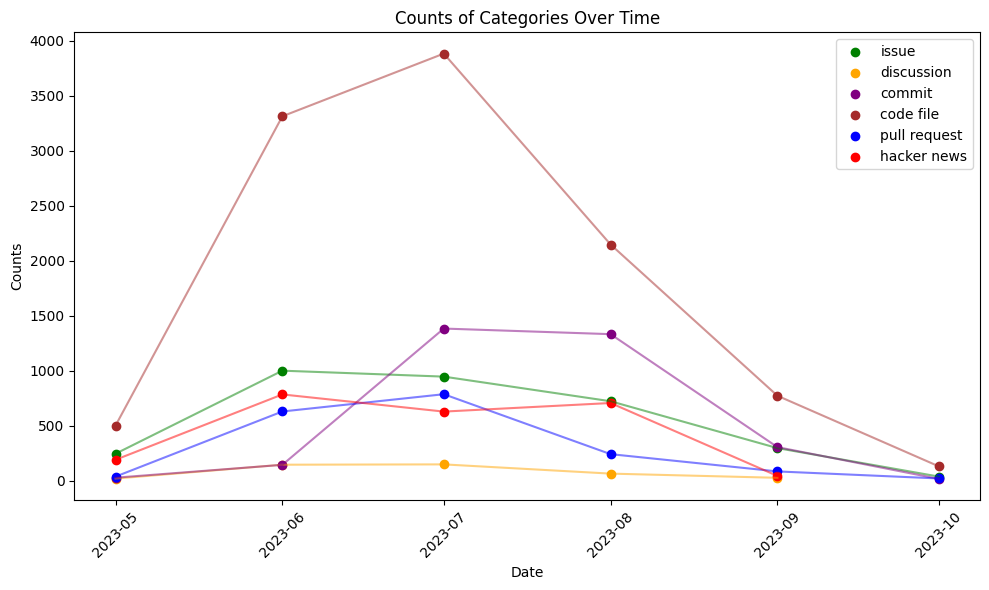

In [43]:
df = time_df

df.columns = pd.to_datetime(df.columns)

df = df.sort_index(axis=1)
# df = df.loc[:, df.columns.year >= 2022]

category_colors = {
    'hacker news': 'red',
    'pull request': 'blue',
    'issue': 'green',
    'discussion': 'orange',
    'commit': 'purple',
    'code file': 'brown'
}

# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
for category in df.index:
    color = category_colors.get(category, 'black')  # Default to black if color not defined
    ax.scatter(df.columns, df.loc[category], label=category, color=color)

    # Add lines connecting points
    ax.plot(df.columns, df.loc[category], linestyle='-', alpha=0.5, color=color)

# Add legend and labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
ax.set_title('Counts of Categories Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

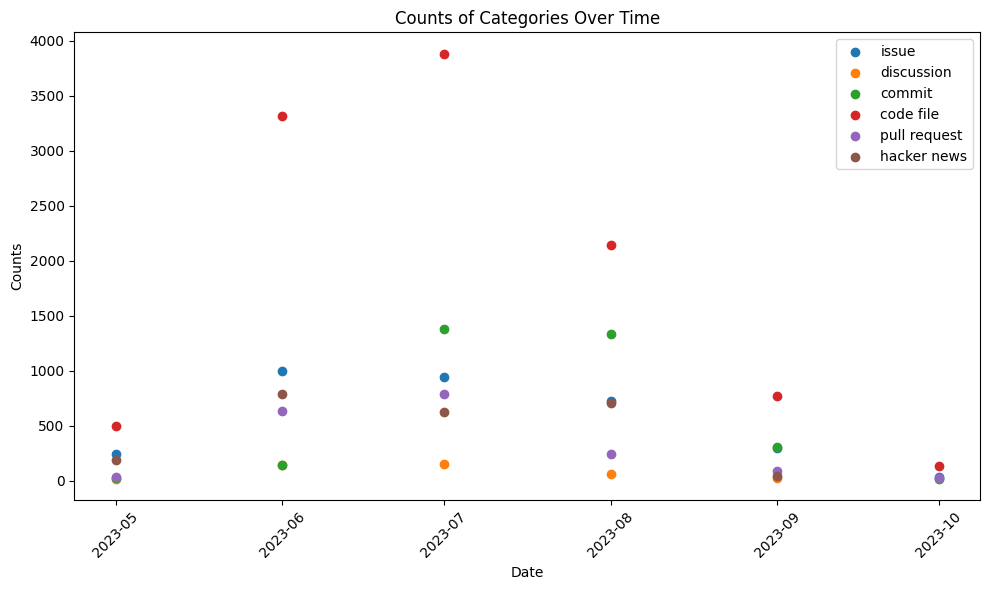

In [44]:
df = time_df

df.columns = pd.to_datetime(df.columns)

df = df.sort_index(axis=1)
df = df.loc[:, df.columns.year >= 2022]

# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
for category in df.index:
    ax.scatter(df.columns, df.loc[category], label=category)

# Add legend and labels
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
ax.set_title('Counts of Categories Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusion 1
The user often respond to old post with ChatGPT links, this result in the inaccuracy of data.
To Do: Use data of the ChatGPT link to estimatetime.

In [62]:
import pandas as pd

type_list = []

def count_type(data):
    local_type_list = []  # Use a local list to avoid modifying the global one
    for source in data['Sources']:
        for share in source['ChatgptSharing']:
            if 'DateOfConversation' in share:
                local_type_list.append((source['Type'], share['DateOfConversation']))
    return local_type_list

# Assuming execute_in_all is a function that applies count_type to all files
type_list += execute_in_all(filelist=dir_list, func=count_type)

time_dict = {}
for type in type_list:
    try:
        date = pd.to_datetime(type[1], format="%B %d, %Y")
        # Use strftime to format the date as "Year-WeekNumber"
        week_time = date.strftime('%Y-%U')
        if week_time not in time_dict:
            time_dict[week_time] = {}
        if type[0] not in time_dict[week_time]:
            time_dict[week_time][type[0]] = 1
        else:
            time_dict[week_time][type[0]] += 1
    except ValueError:
        # Handle the ValueError if the date conversion fails
        continue

print(time_dict)

# Convert the dictionary into a DataFrame
time_df = pd.DataFrame.from_dict(time_dict, orient='index').fillna(0)  # Fill NaN with 0

# Sort the DataFrame by the index (which is now the Week of the Year)
time_df = time_df.sort_index(axis=0)
print(time_df)

# Calculate the sum for a specific row if needed, here for the 5th row
row_sum = time_df.iloc[5].sum()
print(row_sum)


{'2023-27': {'issue': 243, 'discussion': 18, 'commit': 294, 'code file': 1088, 'pull request': 253, 'hacker news': 198}, '2023-32': {'issue': 172, 'discussion': 26, 'commit': 472, 'code file': 1060, 'pull request': 68, 'hacker news': 344}, '2023-33': {'issue': 182, 'discussion': 18, 'commit': 147, 'code file': 275, 'pull request': 49, 'hacker news': 167}, '2023-23': {'issue': 252, 'discussion': 27, 'commit': 14, 'code file': 512, 'pull request': 179, 'hacker news': 270}, '2023-34': {'issue': 123, 'discussion': 5, 'commit': 300, 'code file': 281, 'pull request': 65, 'hacker news': 41}, '2023-31': {'issue': 223, 'discussion': 15, 'commit': 363, 'code file': 503, 'pull request': 45, 'hacker news': 144}, '2023-29': {'issue': 278, 'discussion': 23, 'commit': 470, 'code file': 980, 'pull request': 324, 'hacker news': 150}, '2023-30': {'issue': 192, 'discussion': 26, 'commit': 425, 'code file': 654, 'pull request': 70, 'hacker news': 99}, '2023-28': {'issue': 198, 'discussion': 72, 'commit': 

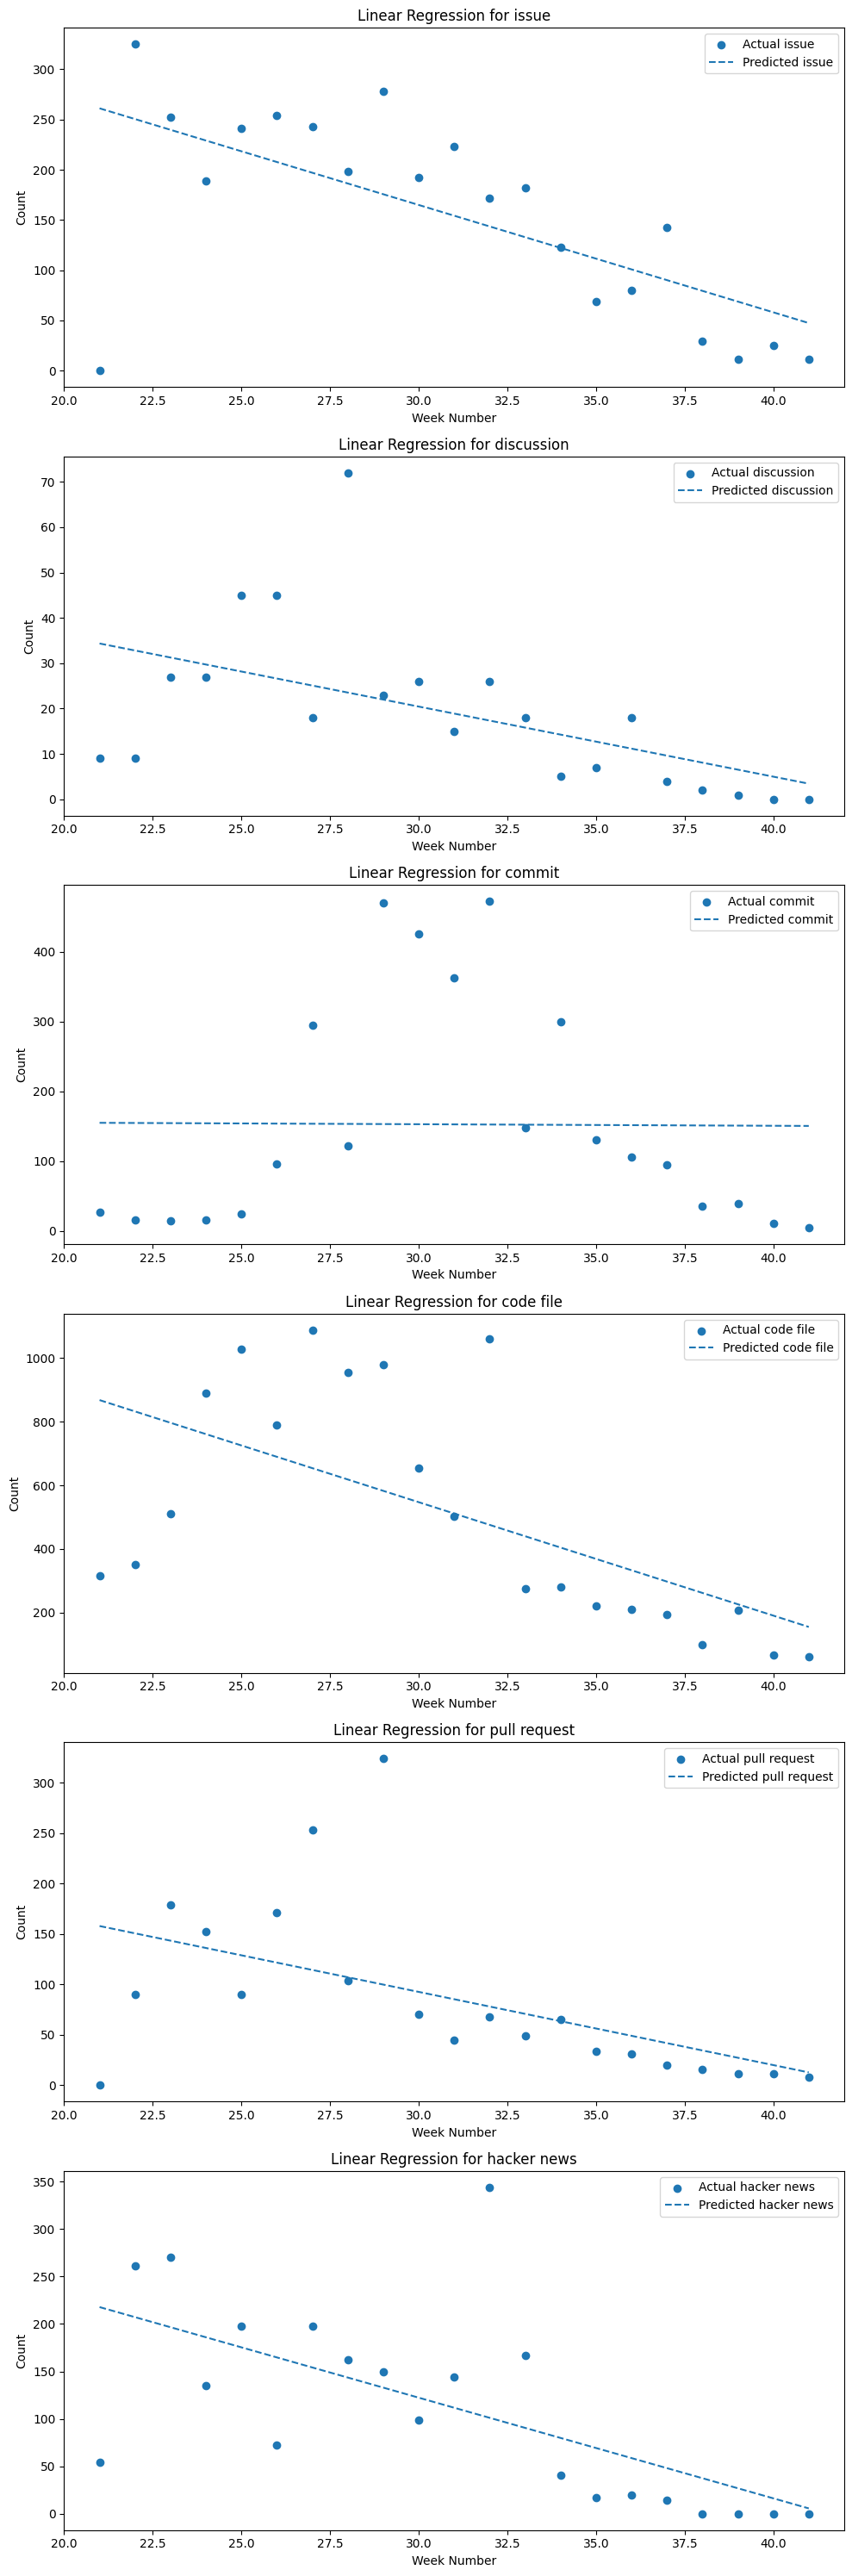

issue - Intercept: 485.58, Slope: -10.69
discussion - Intercept: 66.81, Slope: -1.55
commit - Intercept: 159.35, Slope: -0.22
code file - Intercept: 1616.36, Slope: -35.64
pull request - Intercept: 310.42, Slope: -7.26
hacker news - Intercept: 440.48, Slope: -10.61


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming time_df is prepared as described above and contains the correct data.

# Split the index to get year and week number, and calculate a continuous week number
year_week = time_df.index.str.split('-')
years = np.array([int(yw[0]) for yw in year_week])
weeks = np.array([int(yw[1]) for yw in year_week])
# Calculate the continuous week number: each year adds 52 weeks
time_df['Week_Num'] = (years - years.min()) * 52 + weeks

# Prepare a figure to plot the regression lines
fig, axes = plt.subplots(nrows=time_df.shape[1] - 1, ncols=1, figsize=(10, 5 * (time_df.shape[1] - 1)), squeeze=False)

# Iterate over each category to fit a regression model
for ax, (category) in zip(axes.flatten(), time_df.columns.drop('Week_Num')):
    # Prepare the data for fitting the model
    X = time_df[['Week_Num']].values  # Independent variable (week numbers)
    y = time_df[category].values  # Dependent variable (counts)

    # Drop NaN values
    valid_indices = ~np.isnan(y)
    X = X[valid_indices]
    y = y[valid_indices]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the model
    predictions = model.predict(X)

    # Plot actual counts
    ax.scatter(X, y, label=f'Actual {category}')
    
    # Plot the regression line
    ax.plot(X, predictions, label=f'Predicted {category}', linestyle='--')

    # Add title, legend, and labels
    ax.set_title(f'Linear Regression for {category}')
    ax.set_xlabel('Week Number')
    ax.set_ylabel('Count')
    ax.legend()

plt.tight_layout()
plt.show()

# Print the coefficients of the models
for category in time_df.columns.drop('Week_Num'):
    X = time_df[['Week_Num']].values
    y = time_df[category].values
    
    # Drop NaN values
    valid_indices = ~np.isnan(y)
    X = X[valid_indices]
    y = y[valid_indices]
    
    if len(y) > 0:
        # Fit the model
        model = LinearRegression().fit(X, y)
        
        # Print the coefficients
        print(f"{category} - Intercept: {model.intercept_:.2f}, Slope: {model.coef_[0]:.2f}")
    else:
        print(f"No data available for category: {category}")




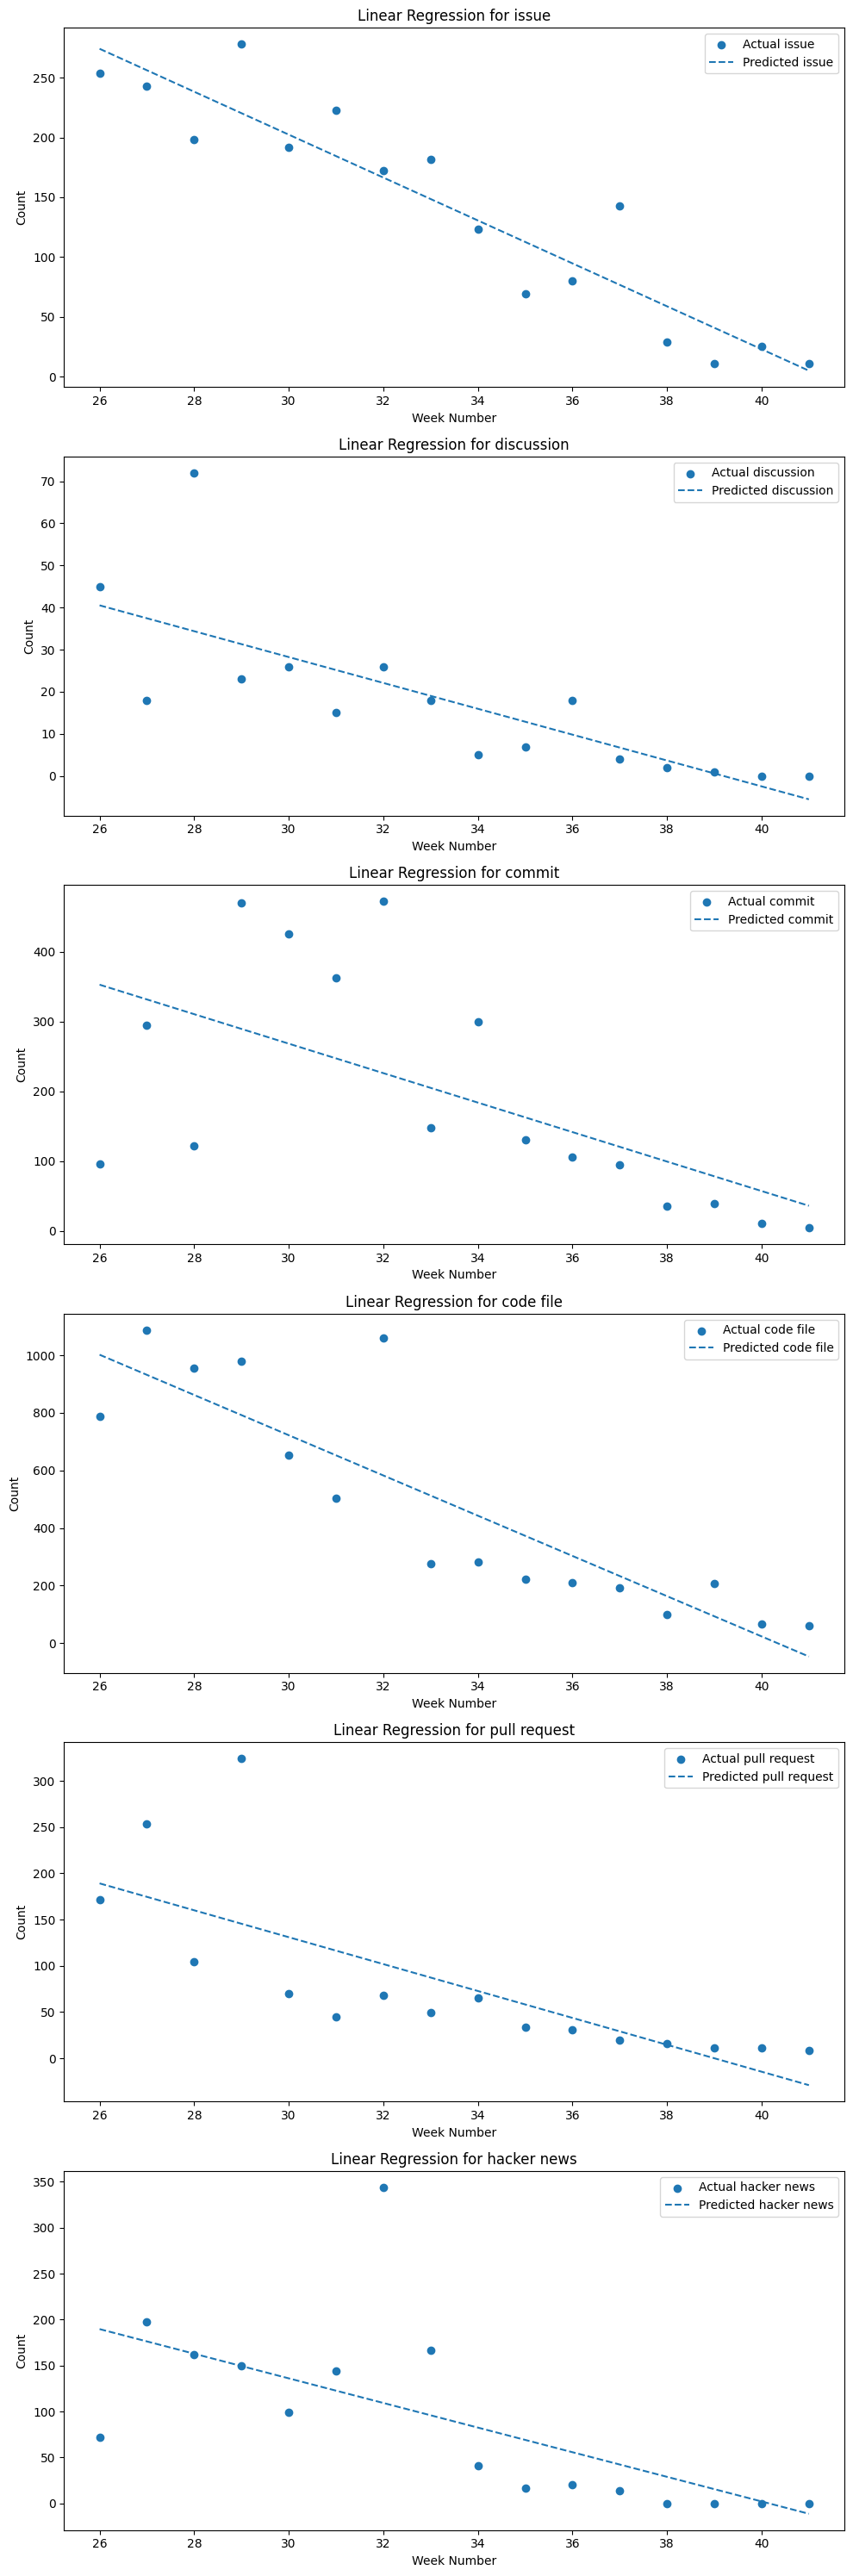

issue - Intercept: 740.74, Slope: -17.95
discussion - Intercept: 120.36, Slope: -3.07
commit - Intercept: 901.97, Slope: -21.13
code file - Intercept: 2819.92, Slope: -69.91
pull request - Intercept: 567.33, Slope: -14.55
hacker news - Intercept: 537.95, Slope: -13.39


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Split the index to get year and week number, and calculate a continuous week number
year_week = time_df.index.str.split('-')
years = np.array([int(yw[0]) for yw in year_week])
weeks = np.array([int(yw[1]) for yw in year_week])
# Calculate the continuous week number: each year adds 52 weeks
time_df['Week_Num'] = (years - years.min()) * 52 + weeks

# Exclude the first 25 weeks of the year from the analysis
time_df = time_df[(weeks > 25)]

# Prepare a figure to plot the regression lines
fig, axes = plt.subplots(nrows=time_df.shape[1] - 1, ncols=1, figsize=(10, 5 * (time_df.shape[1] - 1)), squeeze=False)

# Iterate over each category to fit a regression model
for ax, (category) in zip(axes.flatten(), time_df.columns.drop('Week_Num')):
    # Prepare the data for fitting the model
    X = time_df[['Week_Num']].values  # Independent variable (week numbers)
    y = time_df[category].values  # Dependent variable (counts)

    # Drop NaN values
    valid_indices = ~np.isnan(y)
    X = X[valid_indices]
    y = y[valid_indices]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the model
    predictions = model.predict(X)

    # Plot actual counts
    ax.scatter(X, y, label=f'Actual {category}')
    
    # Plot the regression line
    ax.plot(X, predictions, label=f'Predicted {category}', linestyle='--')

    # Add title, legend, and labels
    ax.set_title(f'Linear Regression for {category}')
    ax.set_xlabel('Week Number')
    ax.set_ylabel('Count')
    ax.legend()

plt.tight_layout()
plt.show()

# Print the coefficients of the models
for category in time_df.columns.drop('Week_Num'):
    X = time_df[['Week_Num']].values
    y = time_df[category].values
    
    # Drop NaN values
    valid_indices = ~np.isnan(y)
    X = X[valid_indices]
    y = y[valid_indices]
    
    if len(y) > 0:
        # Fit the model
        model = LinearRegression().fit(X, y)
        
        # Print the coefficients
        print(f"{category} - Intercept: {model.intercept_:.2f}, Slope: {model.coef_[0]:.2f}")
    else:
        print(f"No data available for category: {category}")
